**<p style='text-align: right;'>Ver. 1.0.3</p>**

# Introductory Applied Machine Learning (IAML) Coursework - Semester 2, 2022-23

### Author: Hiroshi Shimodaira and Rohan Gorantla

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create the files you will submit (the Jupyter (IPynthon) Notebook and the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell.

- We will use the IAML Learn page for any announcements, updates, and FAQs on this assignment. Please ***visit the page frequently*** to find the latest information/changes.
- Data files that you will be using are included in the coursework zip file that you have downloaded from the Learn assignment page for this coursework.
- There is a helper file 'iaml23cw_helpers.py' in the zip file, which you should upload to your environment.
- Some of the topics in this coursework are covered in weeks 7 and 8 of the course. Focus first on questions on topics that you have covered already, and come back to the other questions as the lectures progress.
- Keep your answers brief and concise.
- Make sure to show all your code/working.
- All the figures you present should have axis labels, titles, and grid lines unless specified explicitly. If you think grid lines spoiling readability, you can adjust the line width and/or line style. Figures should not be too small to read.
- Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard.
- When asked to present numerical values, make sure to represent real numbers in the appropriate precision corresponding to your answer. 
- When you use libraries specified in this coursework, you should use the default parameters unless specified explicitly.
- The criteria on which you will be judged include the quality of the textual answers and/or any plots asked for. For higher marks, when asked you need to give good and concise discussions based on experiments and theories using your own words.

- You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

#### Good Scholarly Practice
Please remember the University requirement regarding all assessed work for credit. Details about this can be found at:
http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct

Specifically, this assignment should be your own individual work. We will employ tools for detecting misconduct.

Moreover, please note that Piazza is NOT a forum for discussing the solutions of the assignment. You may ask private questions. You can use the office hours to ask questions.

### SUBMISSION Mechanics
This assignment will account for 30% of your final mark. We ask you to submit answers to all questions.

You will submit (1) a PDF of your Notebook and (2) the Notebook itself via Gradescope.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit**.

1. Make sure your Notebook, the helper file, and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (a few hours) to complete, ensure that all the output and plots have complete before you proceed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them sNNNNNNN.pdf and sNNNNNNN.ipynb, where sNNNNNNN is your matriculation number (student number).

**Details on submission instructions will be announced and documented on Learn before the deadline**. 

The submission deadline for this assignment is **28th March 2023 at 12:00 (midday) UK time (UTC)**.  Don't leave it to the last minute!


#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers, which can be checked by running the following cell. The Python version does not need to be the same, but it should be $3.9.p$, where $p \ge 12$.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from iaml23cw_helpers import *
print_versions();

# You may add other libraries here or in your other cells as needed.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Python	3.9.12 : Ok
Scipy	1.7.3 : Ok
Numpy	1.21.6 : Ok
Sklearn	1.1.1 : Ok
Pandas	1.4.2 : Ok
Matplotlib	3.5.2 : Ok
Seaborn	0.11.2 : Ok


\pagebreak

# Question 1: Experiments with a stock price  data set

#### 65 marks out of 130 for this coursework

The stock price data set we use in this coursework is a stock market index (composite stock price index of common stocks) in a country for the period between 2000 and 2022, consisting of four historical prices ('Open', 'High', 'Low', 'Close', which denote the opening, highest, lowest, and closing prices on the trading day, respectively) and trading volume. For the convenience of the coursework, we have added some features to the data set. They are four [technical indicators](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/learning-center/Understanding-Indicators-TA.pdf) (RSI, SMA, BBP, ADX), 'Tomorrow', and 'Target'. 'Tomorrow' holds the closing price of next trading day, which we will use for price prediction, and 'Target' is a binary indicator (label), which takes 1 if 'Tomorrow' is higher than 'Close', 0 otherwise, which we will use for the prediction of movement direction.

*** Loading data ***
Make sure that you have the data set files "dset_q1a.csv" and "dset_q1b.csv" in your environment. We will use the first file in the following sub questions except the last subquestion 1.8. Run the following cell to load the first file.

In [2]:
# Load the data set "dset_q1a.csv"
df = pd.read_csv("dset_q1a.csv", index_col="Date", parse_dates=True)
# df.head(5)

# ========== Question 1.1 --- [5 marks] ==========
###  Describe the main properties of the data:
1. [Code] Display the shape of the data
2. [Code] Display the range of the dataframe index
3. [Code] What data are present and what types of data are they? Display the information using **pandas.DataFrame.info**.
4. [Code] Display the highest price, the lowest price, and the mean of the closing price ('Close') for each year in the data. (Hint: the highest price for each year is sought from the price 'High'.)

\pagebreak
## Your answers for Question 1.1

In [3]:
df.shape

(5642, 11)

In [4]:
print(f"The index range is {df.index.min().date()} to {df.index.max().date()}")

The index range is 2000-02-15 to 2022-12-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5642 entries, 2000-02-15 to 2022-12-28
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      5642 non-null   float64
 1   High      5642 non-null   float64
 2   Low       5642 non-null   float64
 3   Close     5642 non-null   float64
 4   Volume    5642 non-null   int64  
 5   RSI       5642 non-null   float64
 6   SMA       5642 non-null   float64
 7   BBP       5642 non-null   float64
 8   ADX       5642 non-null   float64
 9   Tomorrow  5642 non-null   float64
 10  Target    5642 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 528.9 KB


In [6]:
df_copy = df.copy(deep=True)
df_copy['year'] = pd.DatetimeIndex(df_copy.index).year
yearly_stats = df_copy.groupby('year').agg({'High': 'max', 'Low': 'min', 'Close': 'mean'})
print(f"\nYearly high, low, mean closing prices:\n{yearly_stats}")


Yearly high, low, mean closing prices:
             High          Low        Close
year                                       
2000   928.549988   483.579987   704.482358
2001   715.929993   463.540009   572.834472
2002   943.539978   576.489990   756.978033
2003   824.260010   512.299988   679.830001
2004   939.520020   713.989990   832.916307
2005  1383.140015   866.169983  1073.577590
2006  1464.699951  1192.089966  1352.218255
2007  2085.449951  1345.079956  1713.674165
2008  1901.130005   892.159973  1529.494194
2009  1723.170044   992.690002  1429.038258
2010  2052.969971  1532.680054  1764.993504
2011  2231.469971  1644.109985  1984.542060
2012  2057.280029  1758.989990  1930.372702
2013  2063.280029  1770.530029  1960.499716
2014  2093.080078  1881.729980  1982.158124
2015  2189.540039  1800.750000  2011.848749
2016  2073.889893  1817.969971  1987.003253
2017  2561.629883  2015.680054  2310.368425
2018  2607.100098  1985.949951  2325.009433
2019  2252.050049  1891.810059  2106

\pagebreak

# ========== Question 1.2 --- [8 marks] ==========
Perform an *exploratory data analysis* on the dataset by studying the following:
1. [Code and text] Plot the stock market closing price ('Close') and comment on it.
2. [Code] For the period from the beginning of year 2007 until the end of 2008, plot the closing price ('Close') and volumes ('Volume') respectively, where you show months on the x-axis and indicate the positions of the highest and lowest values for the period.
3. [Code and text] Plot a pairplot for the dataset features using the seaborn **pairplot** and report the patterns in the given dataset.
4. [Code] Plot the correlation matrix for the dataset features.
5. [Text] Based on the results you obtained in 3 and 4 above, comment on the relationships among the features present in the dataset.

\pagebreak
## Your answers for Question 1.2

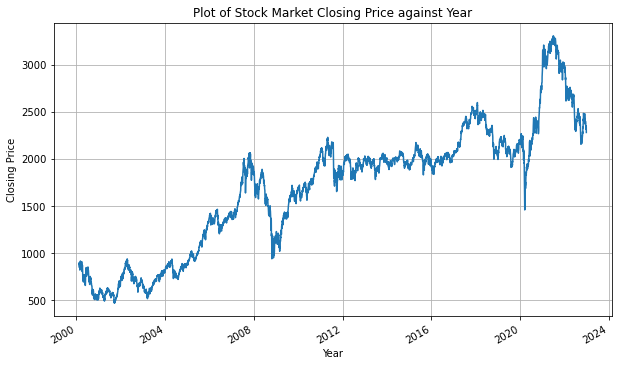

In [7]:
df['Close'].plot(figsize=(10,6), grid=True)
plt.title('Plot of Stock Market Closing Price against Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

# comment 
# The plot of closing prices over the time period(2000-2024) appears to be volatile and many fluctuations.
# This indicates that the stock is a more unstable one with closing prices futher decreasing in the future.

Text(0.5, 0, 'Months')

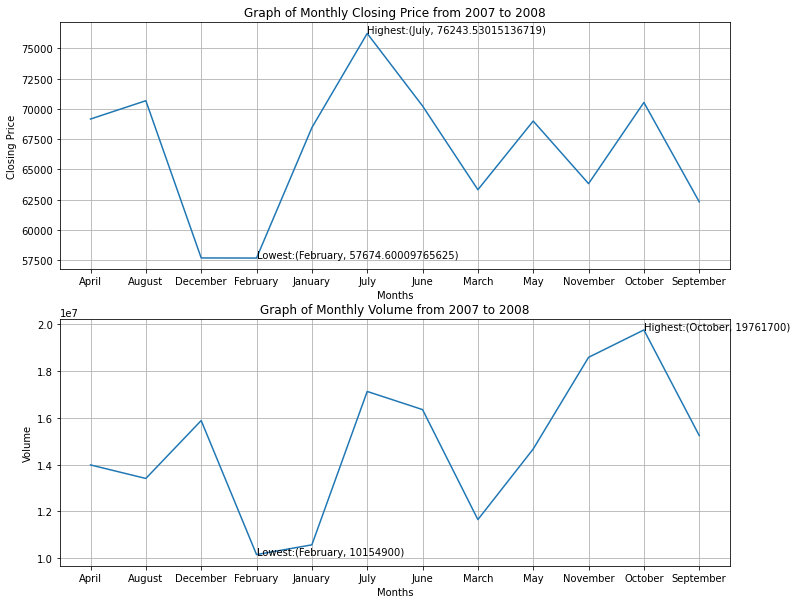

In [8]:
df_2007_to_2008 = df_copy[(df_copy.index >= '2007-01-01') & (df_copy.index <= '2008-12-31')][['Close','Volume']]
monthly_df = df_2007_to_2008.groupby(df_2007_to_2008.index.strftime('%B')).sum()
monthly_df.index.name = 'Months'

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax[0].plot(monthly_df.index, monthly_df['Close'])
ax[0].set_ylabel('Closing Price')
ax[0].set_title('Graph of Monthly Closing Price from 2007 to 2008')

ax[1].plot(monthly_df.index, monthly_df['Volume'])
ax[1].set_ylabel('Volume')
ax[1].set_title('Graph of Monthly Volume from 2007 to 2008')

# annotating the highest and lowest points for closing prices and volume
highest_close_month = monthly_df['Close'].idxmax()
highest_close_value = monthly_df.loc[highest_close_month, 'Close']
lowest_close_month = monthly_df['Close'].idxmin()
lowest_close_value = monthly_df.loc[lowest_close_month, 'Close']

ax[0].annotate(f'Highest:({highest_close_month}, {highest_close_value})', xy=(highest_close_month, highest_close_value))
ax[0].annotate(f'Lowest:({lowest_close_month}, {lowest_close_value})',xy=(lowest_close_month, lowest_close_value))

highest_vol_month = monthly_df['Volume'].idxmax()
highest_vol_value = monthly_df.loc[highest_vol_month, 'Volume']
lowest_vol_month = monthly_df['Volume'].idxmin()
lowest_vol_value = monthly_df.loc[lowest_vol_month, 'Volume']

ax[1].annotate(f'Highest:({highest_vol_month}, {highest_vol_value})', xy=(highest_vol_month, highest_vol_value))
ax[1].annotate(f'Lowest:({lowest_vol_month}, {lowest_vol_value})',xy=(lowest_vol_month, lowest_vol_value))

ax[0].grid()
ax[1].grid()

ax[0].set_xlabel('Months')
ax[1].set_xlabel('Months')


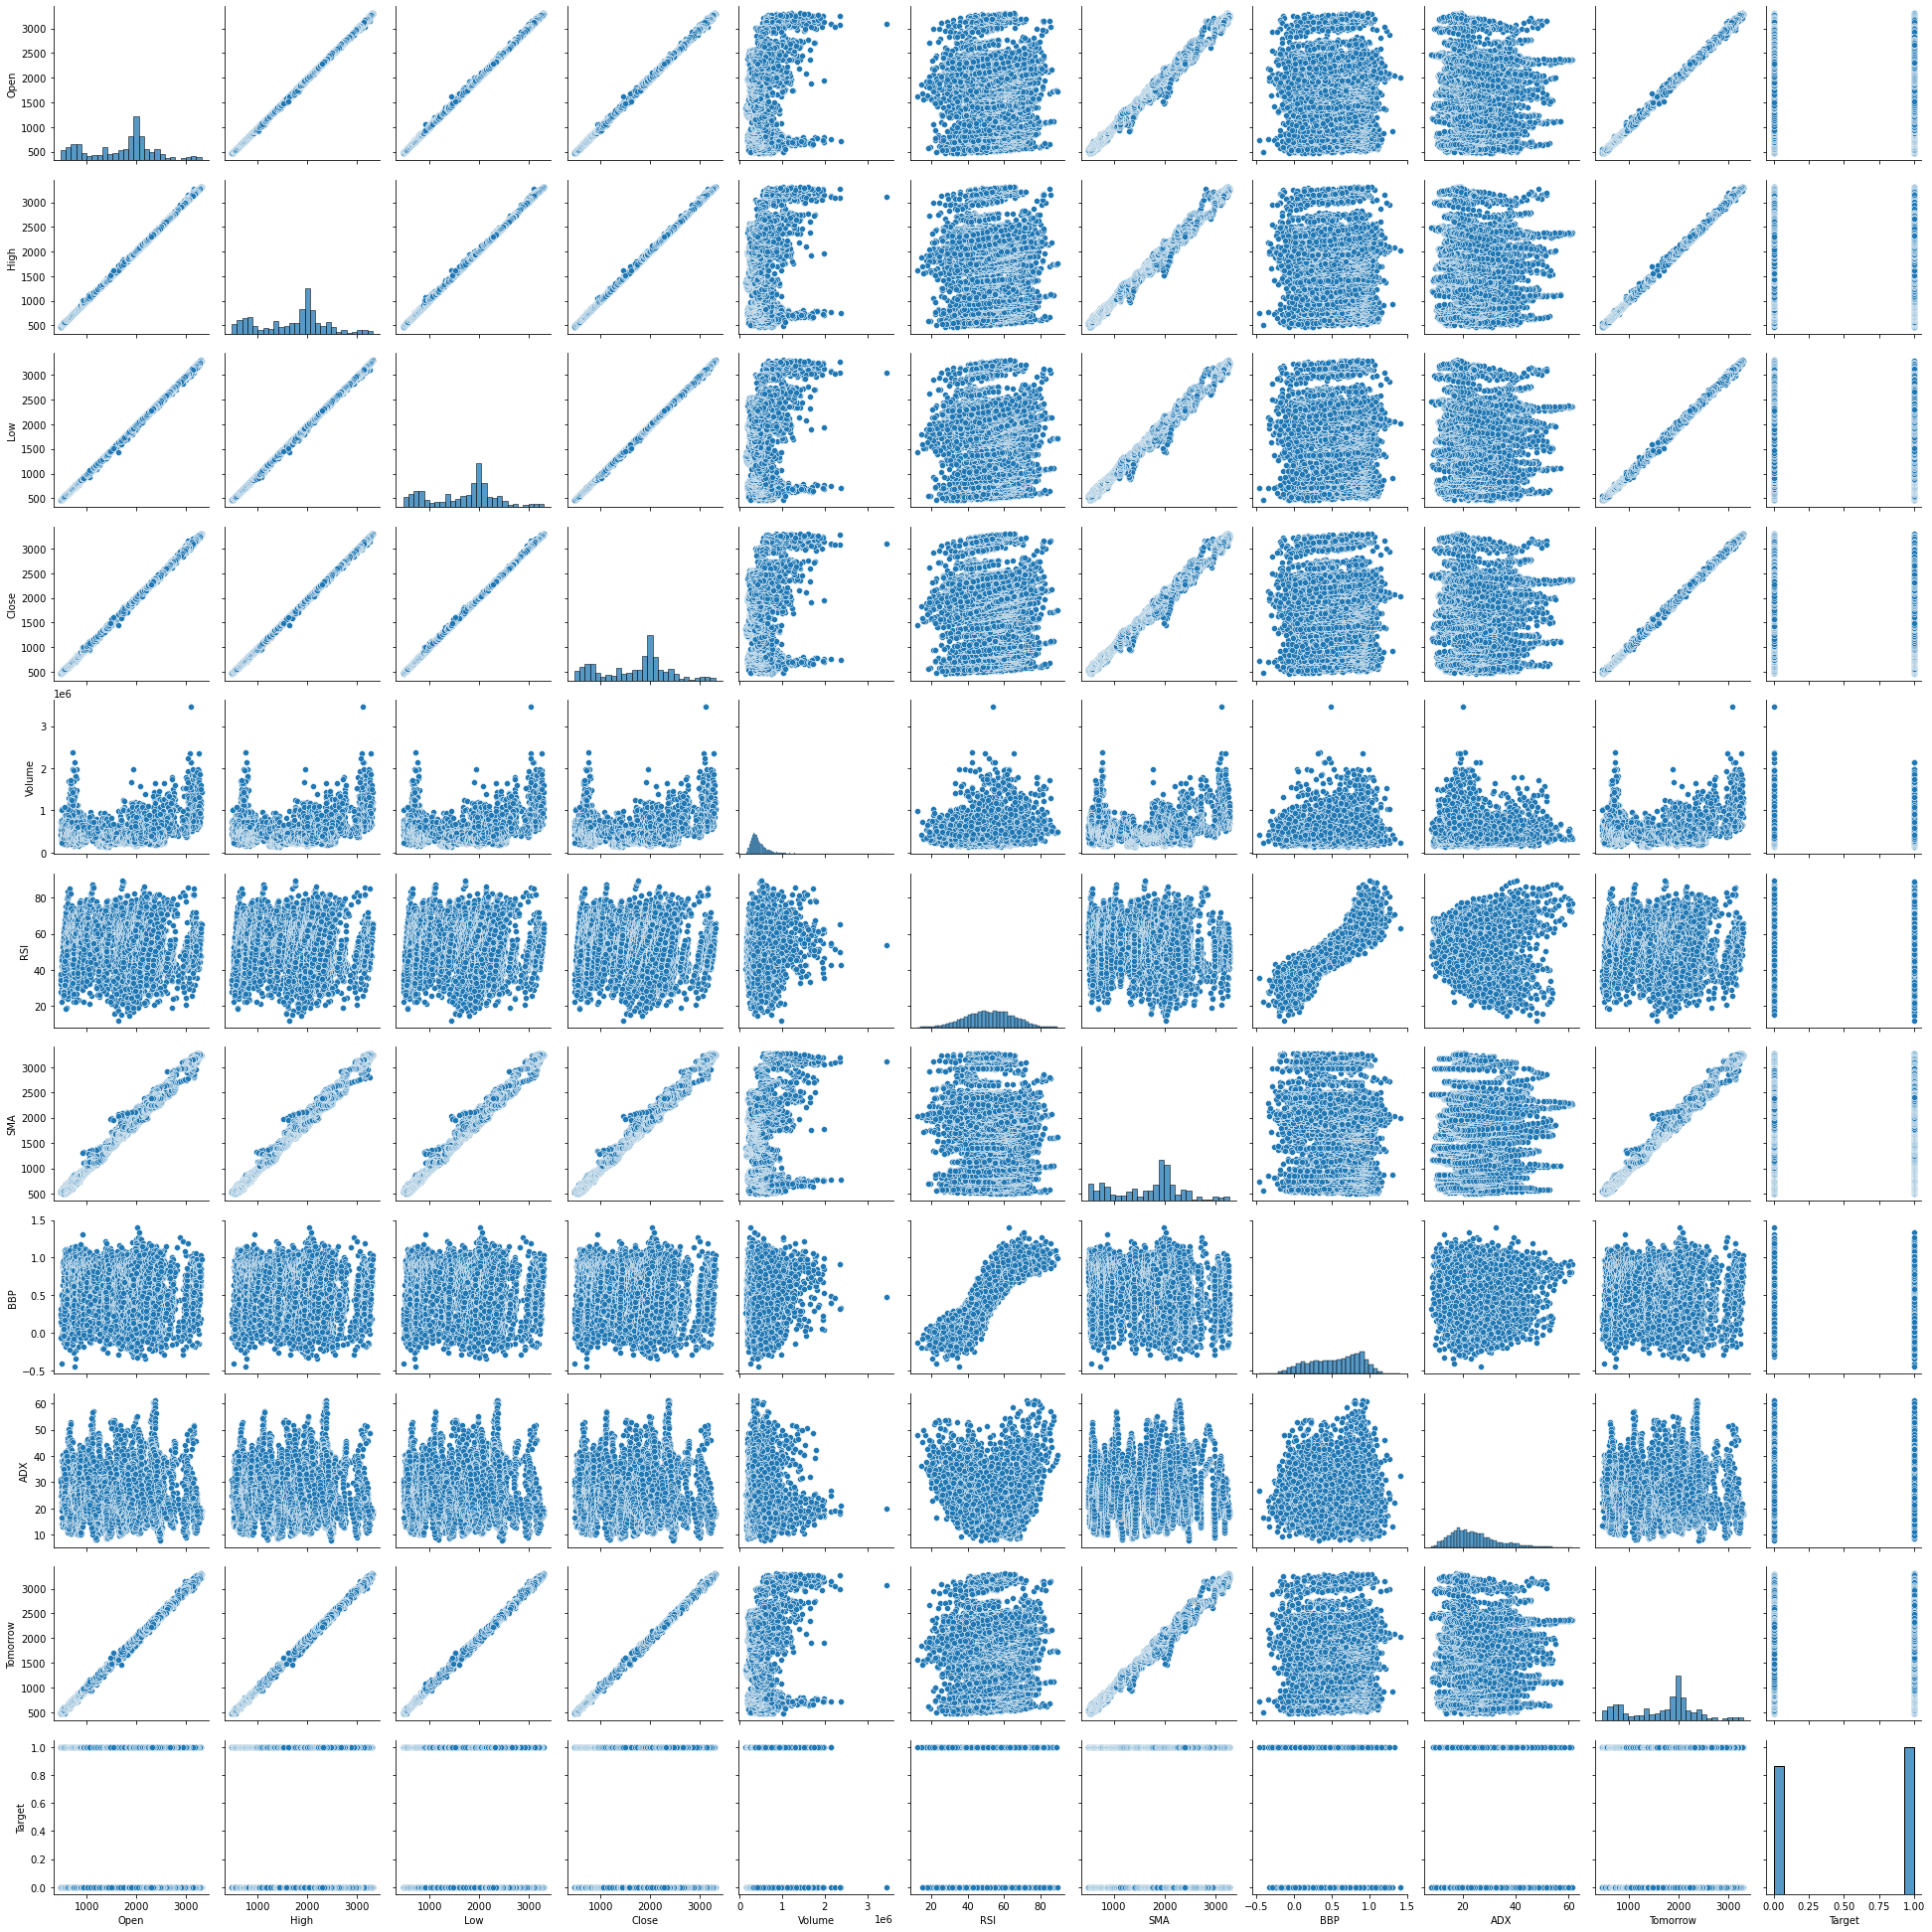

In [9]:
sns.pairplot(df)
plt.show()

# Comment
# On the diagonal of the pairplot shows histograms indicating that most of the features are somewhat normally
# distributed with the exception of Volume, whose distribution is highly skewed to the right. 
# There are a couple of patterns that looks like a line with a positive slope, which could suggest those features are 
# positively correlated, for instance, that of Open and Close features. Other patterns also have scattered plots of various kinds.
# The plot of Target and the other features appears to have separated into two lines each representing the values of Target i.e 0 and 1. 

<AxesSubplot:>

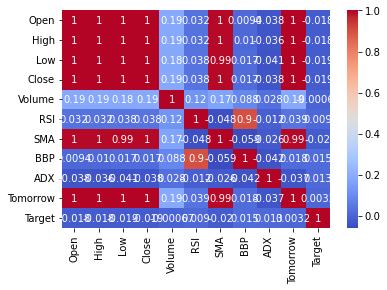

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#(5)
From 3 and 4, the following relationships can be deduced:
1. Each feature is strongly positive correlated with itself as shown in the diagonal.
2. Tomorrow is strongly positive correlated with Open, High, Low, Close and SMA and vice versa. 
3. There exist a strong positive correlation among the following features: Open, High, Low, Close.
4. SMA also is strongly positive correlated with Open, High, Low, Close and vice versa. 
5. Volume appears to be positively correlated with all the other features. 
5. Some of these positive correlations are expected. For instance, the positive correlation between the Open and Close features, is expected because the closing price is often influenced by the opening price and that of High and Low features, is also expected because these high and low prices are often used to measure stock volatility. 

\pagebreak

# ========== Question 1.3 --- [9 marks] ==========

We here apply linear regression to predict 'Tomorrow' from 'SMA'.
For this question, you should use the sklearn implementation of Linear Regression. Use the first 80% of the data for training and the rest 20% for testing ***without shuffling***.
1. [Code] Fit a linear regression model to the training data so that we can predict 'Tomorrow' from 'SMA'. Report the estimated model parameters w and the coefficient of determination $R^2$.
2. [Text] Describe what the parameters represent for the fitted dataset with the linear regression model.
3. [Code] Report the root mean-square error (RMSE) for the training set and test set, respectively.
4. [Code] Plot predicted values versus actual values for the test set, where the x-axis corresponds to actual values and the y-axis to predicted values. Draw a line of $y=x$ on the plot.
5. [Code] Plot 'Tomorrow' versus 'SMA' for the training set and display the regression line on the same graph. The x-axis corresponds to 'SMA' and the y-axis to 'Tomorrow'.
6. [Text] Examining the results (e.g. $R^2$ and RMSE), comment on the predictability of the model.

\pagebreak
## Your answers for Question 1.3

In [11]:
dataframe_len = len(df)
train_num = int(dataframe_len * 0.8)

train_df = df[:train_num]
test_df = df[train_num:]

X_test = test_df[["SMA"]]
y_test = test_df["Tomorrow"]

X_train = train_df[["SMA"]]
y_train = train_df["Tomorrow"]
model = LinearRegression().fit(X_train, y_train)

# the estimated model parameters and R^2
slope, intercept = model.coef_, model.intercept_
r_squared = model.score(X_train, y_train)
print(f"Model Parameters:\n slope = {slope[0]:.3f}\n intercept = {intercept:.3f}")
print(f"R^2(training) = {r_squared:.3f}")
print(f"R^2(testing) = {r2_score(y_test, model.predict(X_test)):.3f}")


Model Parameters:
 slope = 1.001
 intercept = 4.342
R^2(training) = 0.990
R^2(testing) = 0.940


#(2)
The slope of the linear regression line depicts the change in the dependent variable ('Tomorrow') per unit change in the independent variable ('SMA') in the fitted linear regression model. 

When the independent variable ('SMA') is equal to zero, the intercept represents the expected value of the dependent variable ('Tomorrow').

The coefficient of determination, R^2 measures how well the linear regression line fits the data points. A R^2 value of 1 indicates that the model perfectly fits the data points, whereas a value of 0 indicates that the variables have no linear relationship. In this case, the R^2 values are closer to one, indicating that the linear regression model is a better fit for the given data.

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")


Training RMSE: 57.840
Test RMSE: 101.808


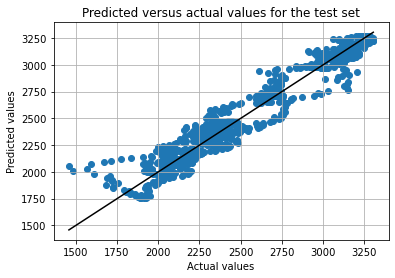

In [13]:
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted versus actual values for the test set')
plt.grid(True)
plt.show()

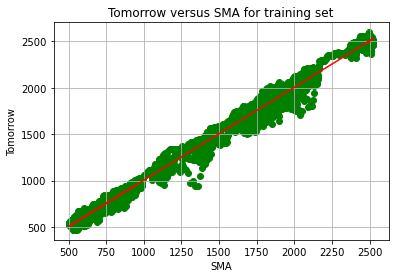

In [14]:
plt.scatter(X_train, y_train,color='green')
plt.plot(X_train, y_train_pred, color='red')
plt.xlabel('SMA')
plt.ylabel('Tomorrow')
plt.title('Tomorrow versus SMA for training set')
plt.grid(True)
plt.show()


#(6)
With relatively high R^2 values for the training set(0.99) and for the test set(0.94), we can infer that the linear regression model is a better fit for the data and is able to make reasonable predictions of 'Tomorrow' based on 'SMA'. 

As the RMSE measures the average distance between the values and the actual values, in our case the RMSE for the test set is 101.80 and the RMSE for the traning set is 57.84, which are relatively small values for the given data, we can deduce that the linear regression model is able to make accurate predictions for the given data. 

Also looking at the graphs plotted in 4 and 5, we can tell the line y=x in 4, has most of the data points closer to it with a just few further from it and the regression line in 5 also shows most of the data points very close to the rregression line wiht just a few further from it. This is a good indicator that the linear regression model is able to make relatively accurate predictions of 'Tomorrow' from 'SMA'. 

Overall, the results suggest that the linear regression model appears to be a reasonable predictor of 'Tomorrow' based on 'SMA', and that the model has some degree of predictability though there may a need for further analysis to fully assess the accuracy, reliability and usefulness of the model.

\pagebreak

# ========== Question 1.4 --- [5 marks] ==========

1. [Code] Instead of using libraries for linear regression, write the code of your own for finding the regression coefficients of the regression model that predicts 'Tomorrow' from 'SMA'. Run your code and show the coefficients, where you should use the same training data as Question 1.3.
2. [Text] One of the common metric used for evaluating the performance of regression models is Mean Squared Error (MSE). Write out the expression for MSE and list one of its limitations and how it can be addresses with alternative metrics.

\pagebreak
## Your answers for Question 1.4

In [15]:
#mean of input and output
X_mean = X_train.mean()
y_mean = y_train.mean()

# deviation of input and output from their respective means
X_dev = X_train - X_mean
y_dev = y_train - y_mean

# slope and intercept of the regression line
slope = (X_dev['SMA'] * y_dev).sum() /(X_dev['SMA'] ** 2).sum()
intercept = y_mean - (slope * X_mean)
print(f"slope: {slope:.3f}\nintercept: {intercept[0]:.3f}")

slope: 1.001
intercept: 4.342


#(2) MSE = 1/n * Σ(y(i) - y_pred(i))^2
where n is the number of samples, y(i) is the ith actual value, y_pred is the ith predicted value.

One limitation of MSE is that it is more sensitive to outliers. It gives higher weight to outliers, even when they might not accurately reflect the performance of the model as a whole. To address this limitation,the Mean Absolute Error (MAE) can be used, which calculates the average absolute differences between the predicted and actual values and it is calculated as MAE = 1/n * Σ |y(i) - y_pred(i)|. MAE gives equal weight to all errors, making it a better metric for models where outliers are less relevant. Nonetheless, it may not be suitable for models where larger errors should be given more weight.

\pagebreak

# ========== Question 1.5 --- [6 marks] ==========
#### Multiple linear regression and polynomial regression

We here consider multiple linear regression that employs four variables ('RSI', 'SMA', 'BBP', 'ADX') to predict 'Tomorrow'. We use the same training data and test data as Question 1.3.
1. [Code] Train the multiple linear regression model on the training set and show the model parameters and the coefficient of determination $R^2$. You also show the RMSE for the training set and test set respectively.
2. [Code] We now extend the model to the polynomial regression model, in which we use all polynomial combinations of the variables up to the specified degree $p$. Using $p=2$, run an experiment in the same manner as 1 above and report the model parameters and $R^2$. You also report the RMSE for the training and test sets respectively. You should use the sklearn implementation of Linear Regression and Polynomial Features. 
3. [Text] Comparing the results you obtained here and those in Question 1.3, report your findings and give discussions briefly.

\pagebreak
## Your answers for Question 1.5

In [16]:
# using splitted data from Q1.3 which has 80 for training (train_df)and 20 for testing (test_df)
X_train, y_train = train_df[['RSI', 'SMA', 'BBP', 'ADX']], train_df['Tomorrow']
X_test, y_test =  test_df[['RSI', 'SMA', 'BBP', 'ADX']], test_df['Tomorrow']

# Create a linear regression object
model_2 = LinearRegression()

# Train the model on the training data
model_2.fit(X_train, y_train)

rounded_slope_values = [round(i,3) for i in model_2.coef_]
# Printing the model parameters
print(f'slope: {rounded_slope_values}')
print(f'Intercept: {model_2.intercept_:.3f}')

# Making predictions on the training and testing data
y_train_pred = model_2.predict(X_train)
y_test_pred = model_2.predict(X_test)

# Calculating the R2 score for the training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating the root mean squared error for the training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the R2 score and RMSE for the training and testing data
print(f'R^2 score (training):{r2_train:.3f}')
print(f'R^2 score (testing): {r2_test:.3f}')
print(f'RMSE (training): {rmse_train:.3f}')
print(f'RMSE (testing):{rmse_test:.3f}')

slope: [4.122, 0.999, -3.852, -0.798]
Intercept: -189.829
R^2 score (training):0.997
R^2 score (testing): 0.979
RMSE (training): 29.344
RMSE (testing):59.725


In [17]:
# Using same X_train, y_train, X_test and y_test as 1.5.1
#degree of the polynomial features
degree = 2

# Creating polynomial features from the input variables
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the linear regression model to the training data
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

# Predicting the target values for the training and test sets
y_train_pred = lin_reg_poly.predict(X_train_poly)
y_test_pred = lin_reg_poly.predict(X_test_poly)

# Calculating the coefficient of determination (R2) for the training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating the root mean squared error (RMSE) for the training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the model parameters and evaluation metrics
slope = lin_reg_poly.coef_
intercept = lin_reg_poly.intercept_
rounded_slope = [round(j,4) for j in slope]
print(f"Model Parameters:\n slope = {rounded_slope}\n intercept = {intercept:.3f}")
print(f"R^2 score (training set): {r2_train:.3f}")
print(f"R^2 score (test set): {r2_test:.3f}")
print(f"RMSE (training set): {rmse_train:.3f}")
print(f"RMSE (test set): {rmse_test:.3f}")

Model Parameters:
 slope = [0.0, 2.8468, 0.954, 76.4941, -1.7372, -0.0122, 0.0011, -1.5054, 0.0521, -0.0, -0.0099, -0.0002, 38.3619, -0.7642, -0.0145]
 intercept = -125.135
R^2 score (training set): 0.998
R^2 score (test set): 0.984
RMSE (training set): 27.987
RMSE (test set): 51.951


#(3) From 1.3, where a linear model was used to predict Tomorrow from SMA, a r^2 score value of 0.990 for the training set and 0.940 for the testing set were recorded. Now, in 1.5.1, a r^2 score value of 0.997 for training set and 0.979 for testing test when using the multiple linear regression model to predict Tomorrow from RSI, SMA, BBP, ADX were recorded. In 1.5.2, where a polymonial regression model was used to also predict Tomorrow from RSI, SMA, BBP, ADX, r^2 score value of 0.998 for training set and 0.984 for testing test were recorded. Although the r^2 score values are all closer to 1 suggesting that the linear regression model is a better fit for the data given and reasonable predictions of Tomorrow can be made from given data with specific features, the polynomial regression model provided the highest r^2 score values. 

Considering the RMSE values, there was a significant decrease from those in 1.3 to those in 1.5.1 and 1.5.2 for both training and testing sets. There was also a decrease in those from 1.5.1 to 1.5.2. The polynomial regression model in 1.5.2 produced the lowest RMSE values for trainin and testing sets. 

Knowing that the polynomial regression model produced the highest r^2 score values and the lowest RMSE values, it can be deduced that the polynomial regression model is able to make the most accurate predictions of Tomorrow using the data with features RSI, SMA, BBP, ADX. 


\pagebreak

# ========== Question 1.6 --- [12 marks] ==========
#### Classification

We now consider the prediction of stock price movement as a binary classification problem - class 1 for upward movement and class 0 otherwise. We use the four technical Indicators, 'RSI', 'SMA', 'BBP', 'ADX', as input features to a classifier to predict 'Target'.

1. [Code] Using 10-fold cross validation with ***no shuffling*** on ***the whole data***, train four classifiers, Logistic Regression, SVM, Decision Trees, and Random Forests. Display, in a single graph, the validation accuracy with boxplot for each model. For each model, you also report the mean accuracy and mean F-score for the training set and validation set, respectively.
(NB: You should obtain the accuracy and F-score for each trial of k-fold cross validation, which will be used for plotting a boxplot. A mean value/score denotes the average value over the $k$ trials, where $k=10$).
<br> ***Note***: you should use sklearn's KFold, SVC, DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression. For each classification model, use default parameters except that "***random_state=0***" should be specified.
2. [Code] Further to the above, for each model, display the confusion matrix for the validation sets, where rows correspond to true class labels and columns to predicted ones, and each element of the matrix shows the number of corresponding instances.
3. [Text] Comment on which model is best with respect to false positives and false negatives. 


\pagebreak
## Your answers for Question 1.6

Training mean accuracy: LR:0.534,SVM:0.533 DT:1.000,RF:1.000
Training mean f1 score: LR:0.693,SVM:0.696 DT:1.000,RF:1.000
Validation mean accuracy: LR:0.531,SVM:0.534 DT:0.519,RF:0.519
Validation mean f1 score: LR:0.692,SVM:0.696 DT:0.542,RF:0.560


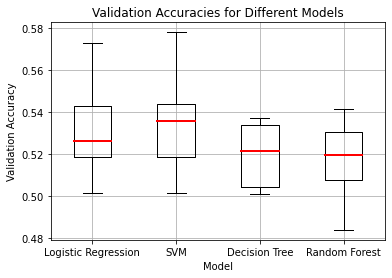

In [18]:
# Defining input features and target variable
X = df[['RSI', 'SMA', 'BBP', 'ADX']].values
y = df['Target'].values

num_folds = 10

# Defining classifiers
logr = LogisticRegression(random_state=0)
svm = SVC(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

# Creating k-fold cross-validation object
k_fold = KFold(n_splits=num_folds, shuffle=False)

# lists to store accuracy and f1 scores for training and validation sets for all classifiers
train_acc, train_f1, val_acc, val_f1 = [], [], [], []

# Training and evaluating each classifier using k-fold cross-validation
for train_index, val_index in k_fold.split(X):
    # Splitting data into training and validation sets
    X_train, y_train = X[train_index], y[train_index] 
    X_val, y_val = X[val_index], y[val_index]

    # Training logistic regression classifier
    logr.fit(X_train, y_train)
    y_logr_pred_train = logr.predict(X_train)
    y_logr_pred_val = logr.predict(X_val)

    # Training SVM classifier
    svm.fit(X_train, y_train)
    y_svm_pred_train = svm.predict(X_train)
    y_svm_pred_val = svm.predict(X_val)

    # Training decision tree classifier
    dt.fit(X_train, y_train)
    y_dt_pred_train = dt.predict(X_train)
    y_dt_pred_val = dt.predict(X_val)

    # Training random forest classifier
    rf.fit(X_train, y_train)
    y_rf_pred_train = rf.predict(X_train)
    y_rf_pred_val = rf.predict(X_val)

    # Evaluating classifiers on training set
    train_acc.append([accuracy_score(y_train, y_logr_pred_train), 
                      accuracy_score(y_train, y_svm_pred_train),
                      accuracy_score(y_train, y_dt_pred_train), 
                      accuracy_score(y_train, y_rf_pred_train)])
    
    train_f1.append([f1_score(y_train, y_logr_pred_train), 
                     f1_score(y_train,y_svm_pred_train),
                     f1_score(y_train, y_dt_pred_train), 
                     f1_score(y_train, y_rf_pred_train)])

    # Evaluating classifiers on validation set
    val_acc.append([accuracy_score(y_val, y_logr_pred_val), 
                    accuracy_score(y_val, y_svm_pred_val),
                    accuracy_score(y_val, y_dt_pred_val), 
                    accuracy_score(y_val,y_rf_pred_val)])
    
    val_f1.append([f1_score(y_val, y_logr_pred_val), 
                   f1_score(y_val, y_svm_pred_val),
                   f1_score(y_val, y_dt_pred_val), 
                   f1_score(y_val, y_rf_pred_val)])

# Calculating mean accuracy and f1 scores for training and validation sets for each classifier
train_acc_mean = np.mean(train_acc, axis=0)
train_f1_mean = np.mean(train_f1, axis=0)
val_acc_mean = np.mean(val_acc, axis=0)
val_f1_mean = np.mean(val_f1, axis=0)

# LR = logistic regression, DT = Decision tree, RF=Random Forest
print(f"Training mean accuracy: LR:{train_acc_mean[0]:.3f},SVM:{train_acc_mean[1]:.3f} DT:{train_acc_mean[2]:.3f},RF:{train_acc_mean[3]:.3f}")
print(f"Training mean f1 score: LR:{train_f1_mean[0]:.3f},SVM:{train_f1_mean[1]:.3f} DT:{train_f1_mean[2]:.3f},RF:{train_f1_mean[3]:.3f}")
print(f"Validation mean accuracy: LR:{val_acc_mean[0]:.3f},SVM:{val_acc_mean[1]:.3f} DT:{val_acc_mean[2]:.3f},RF:{val_acc_mean[3]:.3f}")
print(f"Validation mean f1 score: LR:{val_f1_mean[0]:.3f},SVM:{val_f1_mean[1]:.3f} DT:{val_f1_mean[2]:.3f},RF:{val_f1_mean[3]:.3f}")

# Plotting a boxplot of validation accuracy for each model
val_acc_lr = [acc[0] for acc in val_acc]
val_acc_svm = [acc[1] for acc in val_acc]
val_acc_dt = [acc[2] for acc in val_acc]
val_acc_rf = [acc[3] for acc in val_acc]

fig, ax = plt.subplots()
ax.boxplot([val_acc_lr, val_acc_svm, val_acc_dt, val_acc_rf], 
           labels=['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
           medianprops=dict(color='red', linewidth=2))
ax.set_title('Validation Accuracies for Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Validation Accuracy')
plt.grid(True)
plt.show()


Confusion Matrix for Logistic Regression
Mean Recall: 0.991, Mean Precision: 0.532 for Logistic Regression


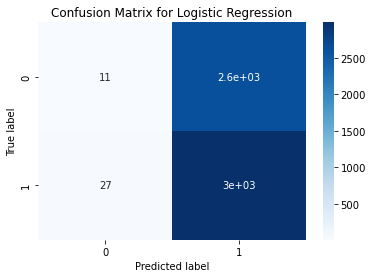

Confusion Matrix for SVM
Mean Recall: 1.000, Mean Precision: 0.534 for SVM


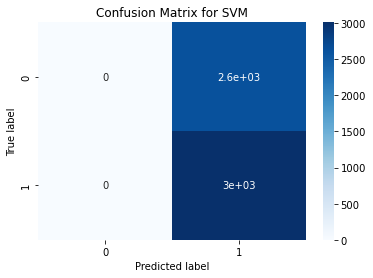

Confusion Matrix for Decision Trees
Mean Recall: 0.541, Mean Precision: 0.553 for Decision Trees


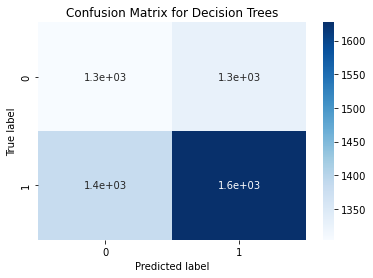

Confusion Matrix for Random Forests
Mean Recall: 0.585, Mean Precision: 0.547 for Random Forests


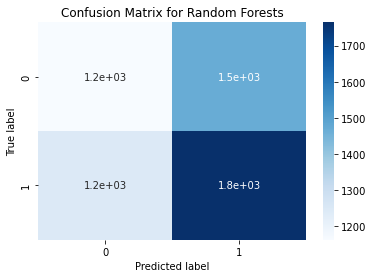

In [19]:
# Using X, y and models from 1.6.1
models = {'Logistic Regression': logr, 'SVM': svm, 'Decision Trees': dt, 'Random Forests': rf}        
# defining the class labels
class_labels = np.unique(y)

# plotting confusion matrix for each model
for name, model in models.items():
    v=np.zeros((2,2))
    recall_l = []
    precision_l = []
    print(f'Confusion Matrix for {name}')
    for i, (train_idx, val_idx) in enumerate(k_fold.split(X)):
        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)
        v += cm
        recall_l.append(recall_score(y_val, y_pred))
        precision_l.append(precision_score(y_val, y_pred))
    print(f'Mean Recall: {np.mean(recall_l):.3f}, Mean Precision: {np.mean(precision_l):.3f} for {name}')
    ax = sns.heatmap(v, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'Confusion Matrix for {name}')
    plt.show()

#(3) 
Based on the confusion matrices from each fold for the validation sets, most of the matrices for logistic regression and SVM recorded either 0 or very low values for false negatives with relatively high values of false positives. On ther other hand, Random forests and Decision trees appear to have relatively high values for both false positives and false negatives. With regards to false poitives and flase negatives, if our aim is to minimise false negatives, then SVM is a better model as it recorded the highest mean recall value in 1.6.2 and if the aim value is to minimize false postives, then Decision Tree is a better model as it recorded the highest mean precision value across all the validation fold sets also calculated in 1.6.2. Also, looking at the mean validation f1_score in 1.6.1, SVM recorded the highest value(0.696) followed by Logistic regression(0.692) then random forest(0.560) then decision tree(0.542). With SVM recording the highest mean f1_score, it indicate it is good at both identifying positive cases (low false negatives) and not misidentifying negative cases as positive (low false positives).

\pagebreak

# ========== Question 1.7 --- [5 marks] ==========
#### Dimensionality Reduction 
Here we will perform dimensionality reduction with PCA to the data and run classification experiments on the dimensionality reduced data.

1. [Code] Using the four technical features ('RSI', 'SMA', 'BBP', 'ADX') as input data, apply PCA to ***the whole data*** and find the minimum set of principal components that explains at least 95% of the variance of the data. Report the number of principal components in the set you found.
2. [Code] Using the set of principal components you found above, reduce the dimensionality of the data and run classification experiments for the four classifiers in the same manner as we did in Question 1.6, but we now use the dimensionality-reduced data instead. You should plot boxplots and report accuracy and F-score in the same manner as Question 1.6. (Note that this experiment is not a formal one, as we apply PCA to the whole data, whose subset is used for testing.)
3. [Text] Comparing the results with those you obtained in Question 1.6, report your findings and give brief discussions.


\pagebreak
## Your answers for Question 1.7

In [20]:
X = df[['RSI', 'SMA', 'BBP', 'ADX']].values
y = df['Target'].values

pca = PCA(n_components=0.95)
pca.fit(X)

num_components = pca.n_components_
print(f"Number of principal components that explain at least 95% of variance: {num_components}")


Number of principal components that explain at least 95% of variance: 1


Training mean accuracy: LR:0.534,SVM:0.533 DT:1.000,RF:0.999
Training mean f1 score: LR:0.696,SVM:0.696 DT:1.000,RF:0.999
Validation mean accuracy: LR:0.534,SVM:0.534 DT:0.514,RF:0.513
Validation mean f1 score: LR:0.696,SVM:0.696 DT:0.525,RF:0.524


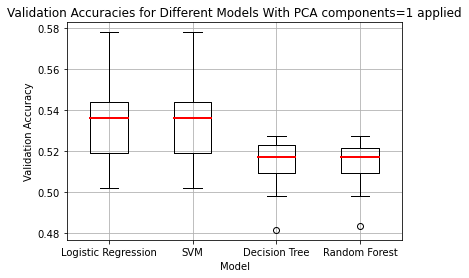

In [21]:
# print(num_components)
# using num of components from 1.7.1
new_pca = PCA(n_components=num_components)
X_pca = new_pca.fit_transform(X)

num_folds = 10

# Defining classifiers
logr = LogisticRegression(random_state=0)
svm = SVC(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

# Creating k-fold cross-validation object
k_fold = KFold(n_splits=num_folds, shuffle=False)

# lists to store accuracy and f1 scores for training and validation sets for all classifiers
train_acc, train_f1, val_acc, val_f1 = [], [], [], []

# Training and evaluating each classifier using k-fold cross-validation
for train_index, val_index in k_fold.split(X_pca):
    # Splitting pca applied data into training and validation sets
    X_train, y_train = X_pca[train_index], y[train_index] 
    X_val, y_val = X_pca[val_index], y[val_index]
    
    # Training logistic regression classifier
    logr.fit(X_train, y_train)
    y_logr_pred_train = logr.predict(X_train)
    y_logr_pred_val = logr.predict(X_val)

    # Training SVM classifier
    svm.fit(X_train, y_train)
    y_svm_pred_train = svm.predict(X_train)
    y_svm_pred_val = svm.predict(X_val)

    # Training decision tree classifier
    dt.fit(X_train, y_train)
    y_dt_pred_train = dt.predict(X_train)
    y_dt_pred_val = dt.predict(X_val)

    # Training random forest classifier
    rf.fit(X_train, y_train)
    y_rf_pred_train = rf.predict(X_train)
    y_rf_pred_val = rf.predict(X_val)

    # Evaluating classifiers on training set
    train_acc.append([accuracy_score(y_train, y_logr_pred_train), 
                      accuracy_score(y_train, y_svm_pred_train),
                      accuracy_score(y_train, y_dt_pred_train), 
                      accuracy_score(y_train, y_rf_pred_train)])
    
    train_f1.append([f1_score(y_train, y_logr_pred_train), 
                     f1_score(y_train,y_svm_pred_train),
                     f1_score(y_train, y_dt_pred_train), 
                     f1_score(y_train, y_rf_pred_train)])

    # Evaluating classifiers on validation set
    val_acc.append([accuracy_score(y_val, y_logr_pred_val), 
                    accuracy_score(y_val, y_svm_pred_val),
                    accuracy_score(y_val, y_dt_pred_val), 
                    accuracy_score(y_val,y_rf_pred_val)])
    
    val_f1.append([f1_score(y_val, y_logr_pred_val), 
                   f1_score(y_val, y_svm_pred_val),
                   f1_score(y_val, y_dt_pred_val), 
                   f1_score(y_val, y_rf_pred_val)])

# Calculating mean accuracy and f1 scores for training and validation sets for each classifier
train_acc_mean = np.mean(train_acc, axis=0)
train_f1_mean = np.mean(train_f1, axis=0)
val_acc_mean = np.mean(val_acc, axis=0)
val_f1_mean = np.mean(val_f1, axis=0)

# LR = logistic regression, DT = Decision tree, RF=Random Forest
print(f"Training mean accuracy: LR:{train_acc_mean[0]:.3f},SVM:{train_acc_mean[1]:.3f} DT:{train_acc_mean[2]:.3f},RF:{train_acc_mean[3]:.3f}")
print(f"Training mean f1 score: LR:{train_f1_mean[0]:.3f},SVM:{train_f1_mean[1]:.3f} DT:{train_f1_mean[2]:.3f},RF:{train_f1_mean[3]:.3f}")
print(f"Validation mean accuracy: LR:{val_acc_mean[0]:.3f},SVM:{val_acc_mean[1]:.3f} DT:{val_acc_mean[2]:.3f},RF:{val_acc_mean[3]:.3f}")
print(f"Validation mean f1 score: LR:{val_f1_mean[0]:.3f},SVM:{val_f1_mean[1]:.3f} DT:{val_f1_mean[2]:.3f},RF:{val_f1_mean[3]:.3f}")

# Plotting a boxplot of validation accuracy for each model
val_acc_lr = [acc[0] for acc in val_acc]
val_acc_svm = [acc[1] for acc in val_acc]
val_acc_dt = [acc[2] for acc in val_acc]
val_acc_rf = [acc[3] for acc in val_acc]

fig, ax = plt.subplots()
ax.boxplot([val_acc_lr, val_acc_svm, val_acc_dt, val_acc_rf], 
           labels=['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
            medianprops=dict(color='red', linewidth=2))
ax.set_title('Validation Accuracies for Different Models With PCA components=1 applied')
ax.set_xlabel('Model')
ax.set_ylabel('Validation Accuracy')
plt.grid(True)
plt.show()


#(3)
values for models when no pca applied

Training mean accuracy: LR:0.534, SVM:0.533, DT:1.000, RF:1.000

Training mean f1 score: LR:0.693, SVM:0.696, DT:1.000, RF:1.000

Validation mean accuracy: LR:0.531, SVM:0.534, DT:0.519, RF:0.519

Validation mean f1 score: LR:0.692, SVM:0.696, DT:0.542, RF:0.560

values for models when pca appied 

Training mean accuracy: LR:0.534, SVM:0.533, DT:1.000, RF:0.999

Training mean f1 score: LR:0.696, SVM:0.696, DT:1.000, RF:0.999

Validation mean accuracy: LR:0.534, SVM:0.534, DT:0.514, RF:0.513

Validation mean f1 score: LR:0.696, SVM:0.696, DT:0.525, RF:0.524

Comparing the mean accuracies and f1 scores of the models with or without pca is applied to the training and validation data, the SVM model did not change in values and stayed consistent on both training and validation data for all metrics. As for the other models, there were slight changes in the metric values. For Logistic regression, the training data metric values remain the same, however there was a slight increase in metric values for validation data when pca is applied. For Decision Trees, the training data metric values remain the same, however there was a decrease  in metric values for validation data when pca is applied. For Random Forest, the training data metric values are almost the same as there is insignificant change when pca is applied or not, however there was also a decrease in metric values for validation data when pca is applied.

\pagebreak

# ========== Question 1.8 --- [15 marks] ==========


We considered only four technical features so far to find that movement classification with the four classifiers is challenging.
We would like to know whether we could improve the performance if we use more features, apply preprocessing to the data, and tune up model parameters.
To find some answer to the question, carry out a mini project with the following conditions:
* We use another data set file ("dset_q1b.csv") for this project, which is an extended version of the original one and contains 15 technical indicators. Load the dataset in the following manner:
>   df1b = pd.read_csv("dset_q1b.csv", index_col="Date", parse_dates=True)
* We consider SVM (SVC) only.
* We split the data into two subsets without shuffling - the first 80% of data should be used for training and validation, and the remaining 20% for testing. 
* We will limit the duration of the project to a few hours only.
* The outcome of the project is not necessarily positive. It is not surprising that you cannot find much improvement.

1. [Text] Describe your ideas for improving the classification performance. Your ideas should be concrete and feasible - the project should be done in the specified time length.
2. [Code and text] Implement your ideas, run experiments, and report the results including accuracy and F-score for the training set and test set respectively.
3. [Code and text] Examine whether your improvement or deterioration is statistically significant.
4. [Text] Summarise your findings and show your answer to the question. In case of negative results, explain the reasons for the negative outcomes.

\pagebreak
## Your answers for Question 1.8

#(1)Given a few hours, I would attempt to use a combination of scaling the data and tuning hyperparameters to attempt to improve the classification performance considering an SVM using all features in the data. 

StandardScaler would be applied in order to scale the data. This is due to the fact that it standardises the features so that they have a zero mean and unit variance, stopping the dominance of some features and making them less sensitive to outliers.  Additionally, in order to fine-tune the SVM's hyperparameters, various kernels, including linear, poly, and rbf with different regularisation parameters (C) values, and kernel co-efficient parameters(gamma) values, will be tested using GridSearchCV with cross validation of 5 folds(default) in order to find the best kernel and parameter estimators using the 80% training and validation sets. Then, predictions on the training and testing sets will be made using the gridSearch's best estimator where the accuracy and f1 score will be recorded. 

In [22]:
df1b = pd.read_csv("dset_q1b.csv", index_col="Date", parse_dates=True)
X = df1b.drop("Target", axis=1).values
y = df1b["Target"].values

# Splitting the data into training + validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalizing the data using standardization
scaler = StandardScaler()
X_trainval_norm = scaler.fit_transform(X_trainval)
X_test_norm = scaler.transform(X_test)

# Defining a search space for the hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','poly'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Performing a grid search over the hyperparameter space and cross validation of 5 folds by default
grid_search = GridSearchCV(SVC(random_state=0), param_grid).fit(X_trainval_norm, y_trainval)

# Printing the results for all parameter combinations
grid_cv_results = pd.DataFrame(grid_search.cv_results_)
grid_cv_results = grid_cv_results[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]
grid_cv_results = grid_cv_results.sort_values(by='mean_test_score', ascending=False)
# The mean test score for each hyperparameter combination is calculated by averaging the validation values from all 5 folds.
# GridSearchCV uses the mean test score to compare the performance of various hyperparameter combinations 
# and select the best hyperparameters based on their performance.
print(f"Results for all parameter combinations:\n {grid_cv_results}")

# Evaluating the best model on the normalised training+validation set
best_model = grid_search.best_estimator_
print(f"Best model according to GridSearchCV for the given data is: {best_model}")

y_train_pred = best_model.predict(X_trainval_norm)
training_accuracy = accuracy_score(y_trainval, y_train_pred)
training_fscore = f1_score(y_trainval, y_train_pred)

# Evaluating the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_fscore = f1_score(y_test, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.3f}")
print(f"Training F-score: {training_fscore:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test F-score: {test_fscore:.3f}")


# Note: Although GridSearchCV suggests that SVC with the parameters C=100,gamma=0.001,kernel='linear' 
# as the best model for SVC,using any of the given gamma values defined above will produce same results 
# as the best model with same C and kernel. The commented code below seconds this fact. 
# for i in [0.001, 0.01, 0.1, 1]:
#     svm = SVC(C=100,gamma=i,kernel='linear').fit(X_trainval_norm,y_trainval)
#     y_train_pred = svm.predict(X_trainval_norm)
#     training_accuracy = accuracy_score(y_trainval, y_train_pred)
#     training_fscore = f1_score(y_trainval, y_train_pred)

#     # Evaluating the best model on the test set
#     y_test_pred = svm.predict(X_test)
#     test_accuracy = accuracy_score(y_test, y_test_pred)
#     test_fscore = f1_score(y_test, y_test_pred)
#     print("gamma",i)
#     print(f"Training Accuracy: {training_accuracy:.5f}")
#     print(f"Training F-score: {training_fscore:.5f}")
#     print(f"Test Accuracy: {test_accuracy:.5f}")
#     print(f"Test F-score: {test_fscore:.5f}")

Results for all parameter combinations:
    param_C param_kernel param_gamma  mean_test_score
45     100       linear           1         0.972062
42     100       linear         0.1         0.972062
39     100       linear        0.01         0.972062
36     100       linear       0.001         0.972062
24      10       linear       0.001         0.935033
33      10       linear           1         0.935033
30      10       linear         0.1         0.935033
27      10       linear        0.01         0.935033
35      10         poly           1         0.881818
23       1         poly           1         0.878492
47     100         poly           1         0.872949
15       1       linear        0.01         0.872506
18       1       linear         0.1         0.872506
21       1       linear           1         0.872506
12       1       linear       0.001         0.872506
11     0.1         poly           1         0.860754
44     100         poly         0.1         0.860754
32   

In [23]:
#(3) Using the same C and gamma value to compare the classification accuracies and f1 score
kernel = ['linear','poly','rbf']
for i in kernel:
    svm = SVC(C=100,gamma=1,kernel=i,random_state=0).fit(X_trainval_norm,y_trainval)

    y_train_pred = svm.predict(X_trainval_norm)
    training_accuracy = accuracy_score(y_trainval, y_train_pred)
    training_fscore = f1_score(y_trainval, y_train_pred)

    # Evaluating the best model on the test set
    y_test_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_fscore = f1_score(y_test, y_test_pred)
    print(f"Kernel : {i}")
    print(f"Training Accuracy: {training_accuracy:.4f}")
    print(f"Training F-score: {training_fscore:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F-score: {test_fscore:.4f}")

# From the below results, the training accuracies and f1-score values increased among the kernels, 
# however the test accuracies and f1-score decreased significantly with the linear kernel recording 
# the highest values followed by rbf then poly. 
    

Kernel : linear
Training Accuracy: 0.9794
Training F-score: 0.9807
Test Accuracy: 0.5390
Test F-score: 0.6994
Kernel : poly
Training Accuracy: 1.0000
Training F-score: 1.0000
Test Accuracy: 0.4637
Test F-score: 0.0000
Kernel : rbf
Training Accuracy: 1.0000
Training F-score: 1.0000
Test Accuracy: 0.5363
Test F-score: 0.6982


#(4) Your text goes here

\pagebreak

# Question 2: Experiments with image data

#### 65 marks out of 130 for this coursework

Image data are made up of $H × W × C$ pixels, where $H, W, C$ denote the height, width, and the number of channels, respectively. For simplicity, we assume a grayscale image (i.e. $C=1$). Let $p_{ij}$ denote the pixel value at a grid point $(i,j), 1 \le i \le H, 1 \le j \le W$, where $p_{11}$ corresponds to the the pixel at the top-left corner and $p_{HW}$ to the one at the bottom-right corner. We assume that $p_{ij}$ takes an integer value between 0 and 255 (i.e. 8-bit coding). In computers, we can store a grayscale image of $\{p_{ij}\}$ in a $D$-dimensional vector, $x = (x_1,x_2,...,x_D)$, where $D = H \times W$, and $x_1$ corresponds to $p_{11}$ and $x_D$ to $p_{HW}$.

In this question, we use a subset of the [Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist), which contains images of fashion products from ten categories (e.g. T-shirt and trousers). The ten categories are represented as integer numbers ($0,\ldots,9$) and they are referred to as classes. There are 1000 training instances and 200 test instances per class. Each instance is a 28-by-28 grayscale image. Note that you will find some errors (e.g. incorrect labels) in the data set, but we use the data set as it is.
Load the data and apply some pre-processing in the following manner in your code.

***Loading data:***
Make sure that you have the data set file "dset_q2.mat" in your environment and run the following cell to load the data set.

In [24]:
# Load the data set and apply some preprocessing

Xtrn_org, Ytrn_org, Xtst_org, Ytst_org = load_q2_dataset()

Xtrn = np.copy(Xtrn_org) / 255.0   # Training data : (10000, 784)
Xtst = np.copy(Xtst_org) / 255.0   # Testing data : (2000, 784)
Ytrn = np.copy(Ytrn_org)           # Labels for Xtrn : (10000,)
Ytst = np.copy(Ytst_org)           # Labels for Xtst : (2000,)
Xmean = np.mean(Xtrn, axis=0)
Xtrn_mn = Xtrn - Xmean; Xtst_mn = Xtst - Xmean  # Mean-normalised versions of data


You can display the image of the fourth instance in **Xtrn** in the following manner, for example. Run the following cell.

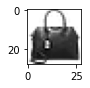

In [25]:
plt.figure(figsize=(1.0,1.0)) # You could try a much large fig size
plt.imshow(Xtrn[3,:].reshape(28,28), cmap=plt.cm.gray_r);
# plt.grid(lw=1, ls=':')
# plt.axis('off')

# ========== Question 2.1 --- [5 marks] ==========
[Code] For each class, display the grayscale images of the first five instances of the class in the training set **(Xtrn,Ytrn)**, where you should follow the specifications shown below.
- You will display a total of 50 images, which should be displayed in a 10-by-5 grid,  where a grid point $(i,j), i=0,\ldots,9, j=0,\ldots,4$,  displays the image of $j$-th instance of class $i$.  Note that we use zero-based numbering here.
- Use plt.imshow to display an image.
- Specify the figure size by plt.figure(figsize=(10, 20)).
- The image of each instance should be displayed properly in the right orientation.
- For each image, you should display the class number and the instance number in **Xtrn**, for which you could use **pyplot.title**. For example, if the first instance of class 0 is held in **Xtrn[21,:]**, the instance number is 21, so that "C0: 21" (or "0: 21") may be the information you should display.

\pagebreak
## Your answers for Question 2.1

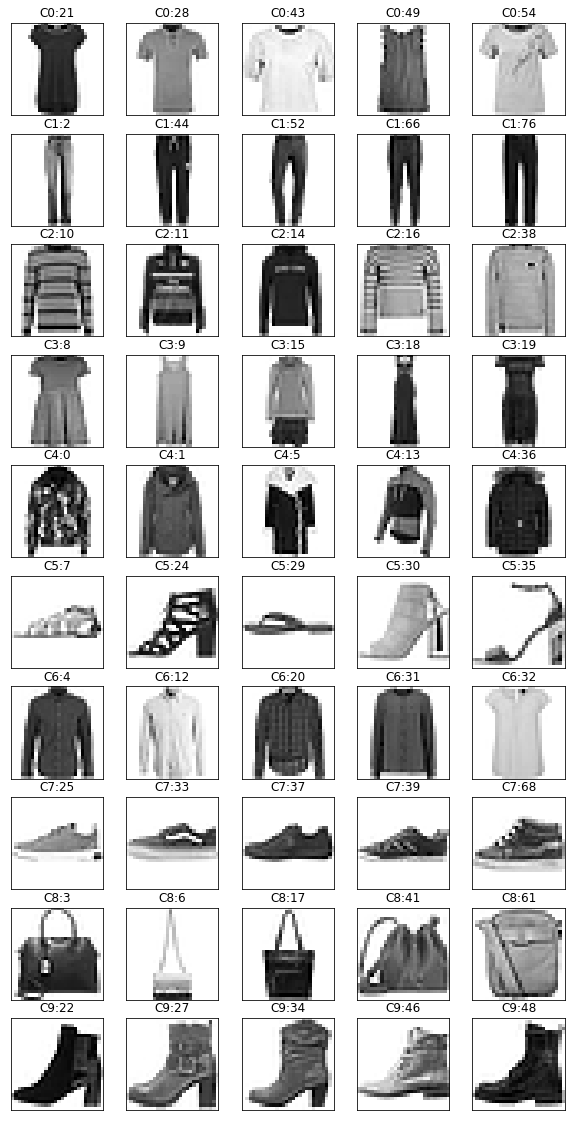

In [26]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(10, 20))
classes = np.unique(Ytrn)
# Looping through each class and display the first 5 instances with their positions in Xtrn
for i in classes:
    instances = Xtrn[Ytrn == i][:5]
    idx_in_Xtrn = [np.where(np.all(Xtrn == instance, axis=1))[0][0] for instance in instances]
    for j, instance in enumerate(instances):
        axs[i][j].imshow(instance.reshape(28,28), cmap=plt.cm.gray_r)
        axs[i][j].set_title(f"C{i}:{idx_in_Xtrn[j]}")
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([]) 
plt.show()

\pagebreak

# ========== Question 2.2 --- [11 marks] ==========

You may have understood there is a wide variety of images in each class. We now would like to display the images of representative instances for each class in the training data set **(Xtrn, Ytrn)**. To that end, we apply the k-means clustering with $k = 6$ to each class. Instead of displaying the image of each cluster centre, which would look blurred due to averaging, we display the image of the instance that is closest to the centroid (i.e. cluster centre) as the representative of the cluster. We also display the mean image (i.e. the image of the mean vector) of each class.

[Code] Following the specifications shown below, display the result.
- For clustering, use sklearn's **KMeans** with the default parameters except that you specify **n_clusters=6** and **random_state=0**. Note that the two parameters should be specified explicitly when you run clustering for each class.
- You will display a total of 60+10=70 images, which should be displayed in a 10-by-7 grid. Each row corresponds to a class. The grid point $(i, 0)$ displays the mean image of class $i$ data, and the grid point $(i, j), j=1,\ldots,6$  displays the image of the representative of cluster $j$-1 for class $i$. Clusters should be sorted in increasing order in terms of the Euclidean distance to the centre of the class (i.e. the mean of the instances in the class), so that the column $j$=1 corresponds to the cluster that is closest to the class centre, whereas column $j$=6 to the one that is farthest from the class centre. Note that we use zero-based numbering.
- For each image of an instance, display the class number ($c$), the number of instances ($m$) in the cluster, and the instance number ($\ell$) in the training data set, in the format of "C{$c$} [{$m$}] {$\ell$}". For example, "C2 [165] 9734" represents $c$=2. $m$=165, and $\ell$=9734.
- Use a large figure size for plotting, e.g. plt.figure(figsize=(16,20)).

\pagebreak
## Your answers for Question 2.2

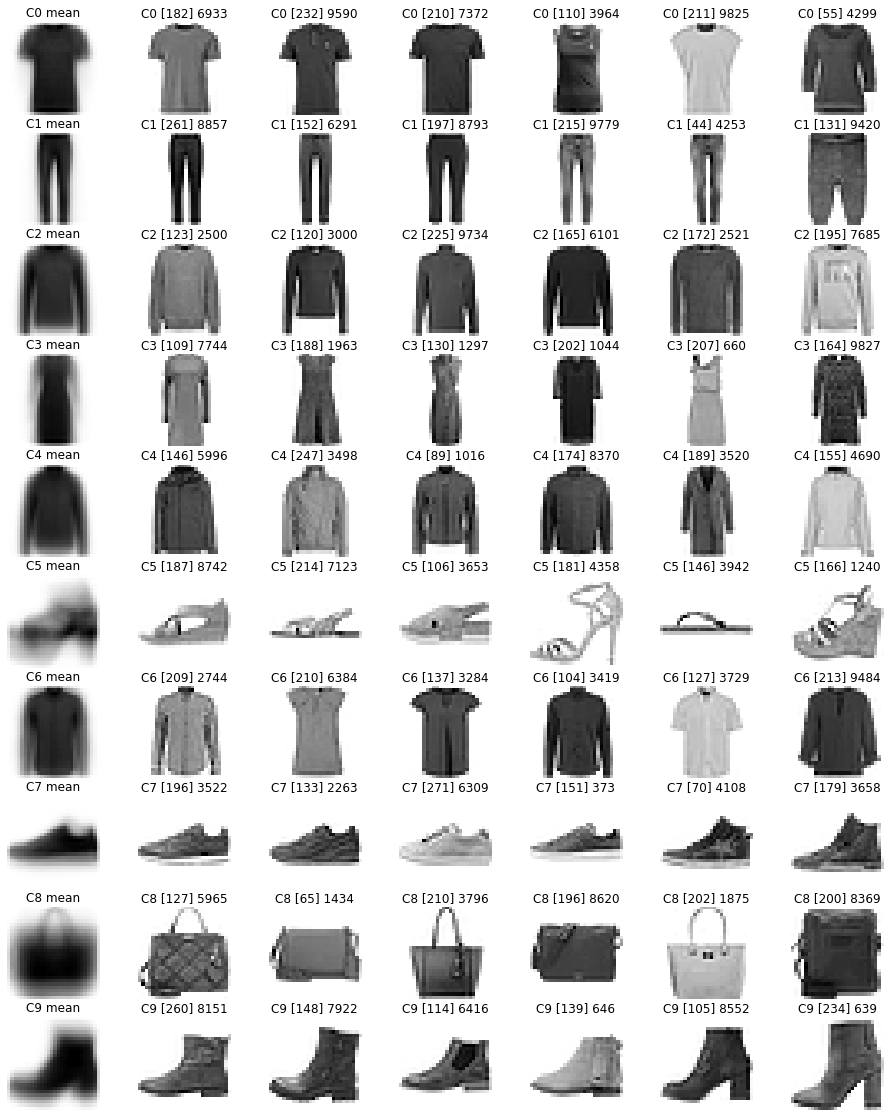

In [27]:
plt.figure(figsize=(16, 20))
classes = np.unique(Ytrn)

for c in classes:
    #instances of the current class
    instances = Xtrn[Ytrn == c]
    
    #the mean image of the class
    mean_image = np.mean(instances, axis=0)
    
    # Display the mean image in the first column of the current row
    plt.subplot(10, 7, c*7 + 1)
    plt.imshow(mean_image.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f'C{c} mean')
    plt.axis('off')
    
    # k-means clustering with k=6
    kmeans = KMeans(n_clusters=6, random_state=0)
    kmeans.fit(instances)
    
    # distance between each centroid and the mean image of the class
    centroids = kmeans.cluster_centers_
    distances = np.linalg.norm(centroids - mean_image, axis=1)
    
    # Sorting the cluster indices by increasing distance
    sorted_cluster_idx = np.argsort(distances)
    
    # displaying representative instances for each cluster
    for j in range(6):
        # Finding the closest instance to the centroid of current cluster
        closest_idx = np.argmin(np.linalg.norm(instances - centroids[sorted_cluster_idx[j]], axis=1))
        closest_instance = instances[closest_idx]
        
        plt.subplot(10, 7, c*7 + j + 2)
        plt.imshow(closest_instance.reshape(28, 28), cmap=plt.cm.gray_r)
        plt.axis('off')

        plt.title(f"C{c} [{kmeans.labels_.tolist().count(j)}] {np.where(np.all(Xtrn == closest_instance, axis=1))[0][0]}")

plt.show()

\pagebreak

# ========== Question 2.3 --- [7 marks] ==========
1. [Code] Apply Principal Component Analysis (PCA) to the data of **Xtrn_mn** using sklearn's **PCA** and show the variances of projected data for the first five principal components. 
2. [Code] Plot a graph of the cumulative explained variance ratio $r_i$ as a function of the number of principal components, $i$, where $ 1 \le i ≤ D$, $r_i$ is defined as follows, and $D$ is the number of dimensions of the data.<br>
> $$ r_i = \frac{\sum_{j=1}^i \lambda_j}{\sum_{j=1}^D \lambda_j}$$
3. [Code] Find the minimum number of principal components required to explain 50%, 60%, 70%, 80%, 90%, and 95% of the total variance, respectively.


\pagebreak
## Your answers for Question 2.3

In [28]:
pca_Xtrn_mn = PCA().fit(Xtrn_mn)
variances = pca_Xtrn_mn.explained_variance_[:5]
print(f'Variances of projected data for the first five principal components:\n{variances}')

Variances of projected data for the first five principal components:
[19.88435226 12.063576    4.12262269  3.38829987  2.64814917]


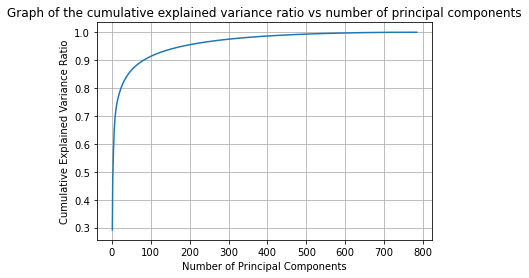

In [29]:
# Using pca model from 2.3.1
D = Xtrn_mn.shape[1]

cumulative_var_ratio = np.cumsum(pca_Xtrn_mn.explained_variance_ratio_)

# plotting the cumulative explained variance ratio vs number of components
plt.plot(np.arange(1, D+1), cumulative_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title("Graph of the cumulative explained variance ratio vs number of principal components")
plt.grid(True)
plt.show()

In [30]:
# using pca model from 2.3.1 and cummulative explained ratio from 2.3.2
percentages = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
percentage_num_components = []
for p in percentages:
    nc = np.argmax(cumulative_var_ratio >= p) + 1
    print(f'minimum of {nc} principal components explained {int(p*100)}% of the total variance')

minimum of 3 principal components explained 50% of the total variance
minimum of 5 principal components explained 60% of the total variance
minimum of 9 principal components explained 70% of the total variance
minimum of 24 principal components explained 80% of the total variance
minimum of 82 principal components explained 90% of the total variance
minimum of 182 principal components explained 95% of the total variance


\pagebreak

# ========== Question 2.4 --- [10 marks] ==========
We now consider a simple application of PCA, in which we (as sender A) apply dimensionality reduction to image samples and send them to someone (as receiver B) who tries to reconstruct the samples from the dimensionality-reduced samples. The underlying assumption is that the both parties, A and B, share the same set of principal components (i.e. eigen vectors) and the mean vector (**Xmean**) in advance.
You will expect some degradation in the reconstructed images.
1. [Code] Follow the instructions shown below.
- Apply PCA to the whole **Xtrn_mn** at first to find all principal components. 
- For each class and for each number of principal components $K = 5,20,50,200,400$, apply the dimensionality reduction to the first instance in the class.
- Display the reconstructed images and the original images in a 10-by-6 grid, where each row corresponds to a class (in increasing order) and the first five columns show the reconstructed images for the five values of $K$ (in increasing order) and the last column to shows the original image.
- Note that you should add **Xmean** to each reconstructed data to display the corresponding image.
2. [Text] Explain your findings briefly.

\pagebreak
## Your answers for Question 2.4

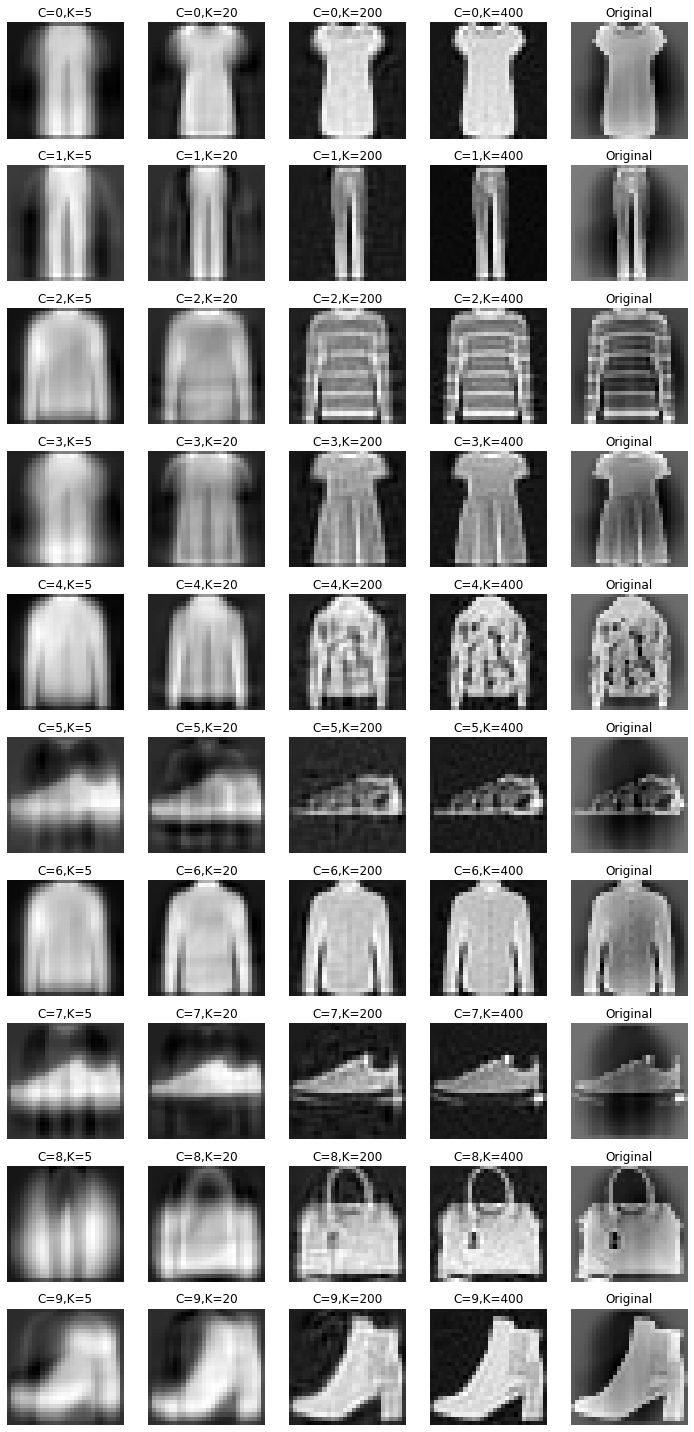

In [31]:
Xtrn_mn_pca = PCA().fit(Xtrn_mn)
pca_compo = Xtrn_mn_pca.components_
principal_com = [5, 20, 200, 400]

#classes and the indices of their first instance in Ytrn
class_idx = [(c,np.where(Ytrn == c)[0][0]) for c in np.unique(Ytrn)]

# Displaying reconstructed and original images for each class and each value of component
fig, axs = plt.subplots(10, 5, figsize=(10, 20))
for i, idx in enumerate(class_idx):
    for j, k in enumerate(principal_com):
        first_cls_inst = Xtrn_mn[idx[1], :]
        reduced_inst = first_cls_inst.dot(pca_compo[:k].T)
        reconstructed_inst = reduced_inst.dot(pca_compo[:k]) + Xmean
        # Displaying the reconstructed image
        axs[i, j].imshow(reconstructed_inst.reshape(28, 28), cmap='gray')
        axs[i, j].set_title(f'C={i},K={k}')
        axs[i, j].axis('off')
    
    # Displaying the original image
    axs[i, -1].imshow(first_cls_inst.reshape(28, 28), cmap='gray')
    axs[i, -1].set_title("Original")
    axs[i, -1].axis('off')
    
        
plt.tight_layout()
plt.show()
    


#(2) From the above plot, it can be seen that when the principal component, K is very small e.g K=5, the reconstrusted image is blurred as compared to the original one. This is because less information is used to rebuild the image which degrades the image's quality. On the other hand, as K increases e.g K=200, the reconstructed image becomes more clearer and begins to look somewhat like the original.

\pagebreak

# ========== Question 2.5 --- [6 marks] ==========

We now would like to know how the training data **Xtrn_mn** distribute in a vector space. To visualise distributions, we reduce the dimensionality of the data to two dimensions using PCA and plot the dimensionality-reduced data on the two-dimensional plane spanned by the first principal components. Note that each instance in the data set is now displayed as a single point on the plane.
1. [Code] Plot all the training instances (**Xtrn_mn**) on the two-dimensional PCA plane, where each instance is displayed as a small point with a colour specific to the class of the instance. Use the ’tab10’ colormap for plotting (i.e. cmap="tabl10"), and adjust the marker size so that points do not overlap each other very much.
2. [Text] Give comments on the separation of the classes, and explain your findings briefly.


\pagebreak
## Your answers for Question 2.5

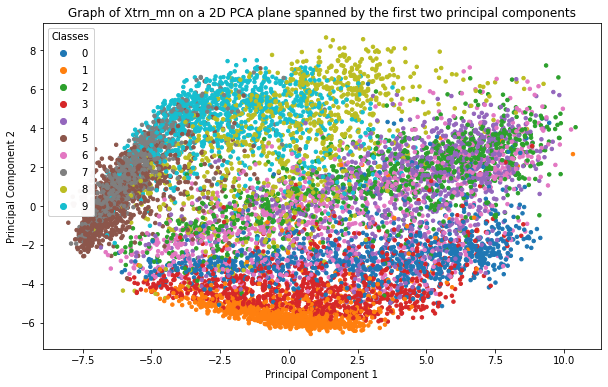

In [32]:
pca = PCA(n_components=2)
Xtrn_pca = pca.fit_transform(Xtrn_mn)

# Create a scatter plot of the projected data
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(Xtrn_pca[:, 0], Xtrn_pca[:, 1], c=Ytrn, cmap='tab10', s=12)
legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax.add_artist(legend)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Graph of Xtrn_mn on a 2D PCA plane spanned by the first two principal components')
plt.show()

#(2) The above plot shows the separation of classes in the 2D PCA plane spanned by the first two principal components.It can be observed that some classes are well-separated from each other like class 1 and class 2 while others like class 2 and class 6 overlap to some extent. This occurs because the dimensionality of the data has been reduced to just two. 

\pagebreak

# ========== Question 2.6 --- [8 marks] ==========

We consider applying multiclass classification to the data set. Make sure that you use **Xtrn_mn** for training and **Xtst_mn** for testing. 
1. [Code] Carry out a classification experiment using sklearn's **LogisticRegression** with "random_state=0", and report the classification accuracy and confusion matrix for the training set and test set respectively. Use sklearn's **ConfusionMatrixDisplay** to display the confusion matrix. Note that you may ignore a warning message in the training.
2. [Code] Run a classification experiment with SVM and report the classification accuracy and confusion matrix for the training set and test set respectively. Use sklearn's **SVC** with "random_state=0".
3. [Text] Based on the results obtained in 1 and 2, explain your findings and give brief discussions.

\pagebreak
## Your answers for Question 2.6

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9237
Testing Accuracy: 0.819


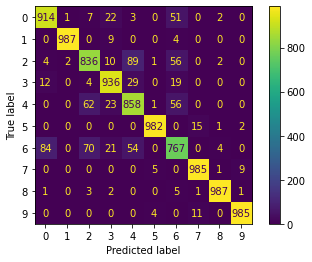

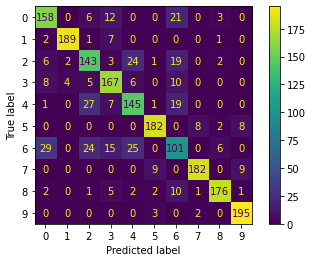

In [33]:
# fitting the logistic regression model on training data
logr_2 = LogisticRegression(random_state=0).fit(Xtrn_mn, Ytrn)

# Predicting classes for training and testing sets
Ytrn_pred = logr_2.predict(Xtrn_mn)
Ytst_pred = logr_2.predict(Xtst_mn)

#accuracy and confusion matrices for training and testing sets
logr_2_trn_acc = accuracy_score(Ytrn, Ytrn_pred)
logr_2_tst_acc = accuracy_score(Ytst, Ytst_pred)

training_cfm = confusion_matrix(Ytrn, Ytrn_pred)
testing_cfm = confusion_matrix(Ytst, Ytst_pred)

# Displaying confusion matrices
ConfusionMatrixDisplay(training_cfm, display_labels=np.unique(Ytrn)).plot()
ConfusionMatrixDisplay(testing_cfm, display_labels=np.unique(Ytrn)).plot()

print(f"Training Accuracy: {logr_2_trn_acc}")
print(f"Testing Accuracy: {logr_2_tst_acc}")

Training accuracy: 0.9145
Test accuracy: 0.855


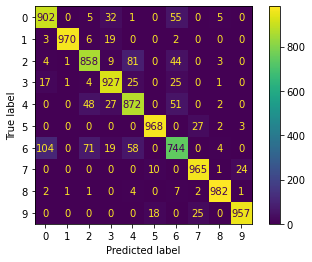

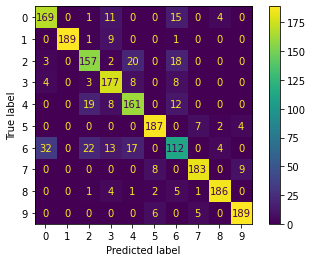

In [34]:
#fitting the svm model on training data
svm = SVC(random_state=0).fit(Xtrn_mn, Ytrn)

# predict the classes of the training and testing data
Ytrn_pred = svm.predict(Xtrn_mn)
Ytst_pred = svm.predict(Xtst_mn)

# accuracy and confusion matrices for training and testing sets
svm_trn_acc = accuracy_score(Ytrn, Ytrn_pred)
svm_tst_acc = accuracy_score(Ytst, Ytst_pred)

svm_trn_cfm = confusion_matrix(Ytrn, Ytrn_pred)
svm_tst_cfm = confusion_matrix(Ytst, Ytst_pred)

# display the confusion matrices using sklearn's ConfusionMatrixDisplay
disp_svm_trn_cfm = ConfusionMatrixDisplay(svm_trn_cfm).plot()
disp_svm_tst_cfm = ConfusionMatrixDisplay(svm_tst_cfm).plot()

print("Training accuracy:", svm_trn_acc)
print("Test accuracy:",svm_tst_acc)

#(3)Based on the results obtained above, it can be seen logistic regression classifier outperformed SVM classifier in terms of training accuracy with a value of 0.9237. However interesting, SVM classifier outperformed logistic regression classifier in terms of testing accuracy with a value of 0.855. 

Looking at the confusion matrices show that the SVM classifier correctly classified most of the items in all 10 classes on the testing data as compared to the logistic regression classifier while the logistic regression classifier correctly classified most of the items in all 10 classes on the training data as compared to the SVM classifier. 

For both classifiers, it appears that the majority of misclassifications occurred when predicting items belongs to class 6 as majority of class 6 items were predicted as class 0.

\pagebreak

# ========== Question 2.7 --- [18 marks] ==========

This is a mini project, in which you are asked to improve the classification accuracy for the logistic regression model as much as possible from the one obtained in Question 2.6. 
1. [Text] Discuss possible approaches, and decide the one(s) you implement. Note that you should stick to the multinomial logistic regression model and should not use other classification models.
2. [Code and Text] Implement the approach you have chosen, carry out a classification experiment and report accuracy for the training set and test set respectively. Note that training and parameter tuning should be done on the training set and not on the test set. In case that you run parameter tuning, show and explain the result clearly.
3. [Text] Making a quick investigation to the result, report your findings and give brief discussions.

\pagebreak
## Your answers for Question 2.7

#(1) Feature engineering is the process of building new features out of already existing ones to enhance the performance of the model. For instance, we may develop new features using domain knowledge or combine new features with current ones.

Regularization involves including a penalty term in the loss function to avoid the model being overfit. L1 or L2 regularisation procedures can be used to accomplish regularisation.

Ensemble learning entails training numerous models and integrating their forecasts to enhance the performance of the model as a whole.

Parameter tuning entails identifying the model's top hyperparameters to use in order to enhance performance on the validation set.

I would want to implement parameter tuning using GridSearchCV to perform grid search and cross-validation on the training set where I test out different C values on different iterations and then evaluate the performance of the multinomial logistic regression model on the test set and report the accuracy.

In [36]:
lr_multi_model = LogisticRegression(multi_class='multinomial',solver='saga', random_state=0)

# Defining the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'max_iter':[200,500,1000]}

# Performing grid search and cross-validation
grid_search = GridSearchCV(lr_multi_model, param_grid=param_grid, cv=5).fit(Xtrn_mn, Ytrn)

# Printing the results for all parameter combinations
grid_cv_results = pd.DataFrame(grid_search.cv_results_)
grid_cv_results = grid_cv_results[['param_C', 'param_penalty','mean_test_score']]
grid_cv_results = grid_cv_results.sort_values(by='mean_test_score', ascending=False)

print(f"grid results:\n {grid_cv_results}")

print(f"Best parameters: {grid_search.best_params_}")

# Evaluating the performance of the model on the training and test set
Ytrn_pred = grid_search.predict(Xtrn_mn)
acc_trn = accuracy_score(Ytrn, Ytrn_pred)
Ytst_pred = grid_search.predict(Xtst_mn)
acc_test = accuracy_score(Ytst,Ytst_pred)
print(f"Training accuracy: {acc_trn}")
print(f"Test accuracy: {acc_test}")

# Comment
# In my attempt to increase the classification accuracies, I attempted to try a gridSearch with various C values, the saga solver,
# and the l2 penalty term and  with different iteration values. However, 
# the coefficients of the model were not converging for some of the max_iter values like 200, 500 and the gridSearch model was 
# taking way too long to provide results.  

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

KeyboardInterrupt: 

#(3) Your text goes here